### ANALISIS DATA EKSPLORATIF (A) - RTM 2
### *Muhammad Aryasatya N - 22083010085*

## 1. Eksplorasi Pertanyaan Dasar (Studi Kasus: Breast Cancer Dataset)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import pandas as pd 
data = pd.read_csv('breast-cancer.csv',sep=';')
print(data.head())
data.dropna(inplace=True) 

       age  menopause tumor-size inv-nodes node-caps deg-malig   breast  \
0  '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1  '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2  '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3  '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4  '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   

  breast-quad irradiat                   Class  
0   'left_up'     'no'     'recurrence-events'  
1   'central'     'no'  'no-recurrence-events'  
2  'left_low'     'no'     'recurrence-events'  
3  'left_low'    'yes'  'no-recurrence-events'  
4  'right_up'     'no'     'recurrence-events'  


In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor-size   277 non-null    object
 3   inv-nodes    277 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    277 non-null    object
 6   breast       277 non-null    object
 7   breast-quad  277 non-null    object
 8   irradiat     277 non-null    object
 9   Class        277 non-null    object
dtypes: object(10)
memory usage: 21.8+ KB
None


In [29]:
print(data.describe())

            age  menopause tumor-size inv-nodes node-caps deg-malig  breast  \
count       277        277        277       277       277       277     277   
unique        6          3         11         7         2         3       2   
top     '50-59'  'premeno'    '30-34'     '0-2'      'no'       '2'  'left'   
freq         91        149         57       209       221       129     145   

       breast-quad irradiat                   Class  
count          277      277                     277  
unique           5        2                       2  
top     'left_low'     'no'  'no-recurrence-events'  
freq           106      215                     196  


#### b. Lakukan eksplorasi pada dataset kanker payudara menggunakan Python dan jawablah pertanyaan sebagai berikut:

###### Berapa banyak pasien yang berumur 50-59 tahun dengan derajat keganasan kanker payudara sebesar 2?

In [30]:
# Menggunakan fungsi crosstab untuk menghitung jumlah data dalam dua kategori
jumlah_data_per_kategori = pd.crosstab(data['age'], data['deg-malig'])
jumlah_data_per_kategori

deg-malig,'1','2','3'
age,,,
'20-29',0,1,0
'30-39',7,17,12
'40-49',18,47,24
'50-59',23,39,29
'60-69',15,24,16
'70-79',3,1,1


In [31]:
KategoriPasien1 = data[(data["age"] == "'50-59'") & (data["deg-malig"] == "'2'")]
JumlahPasien1 = KategoriPasien1.shape[0]

print("Di Peroleh Jumlah Pasien Yang Berumur 50-59 Tahun Dengan Derajat Keganasan Kanker Payudara 2 Sebesar :", \
      JumlahPasien1, "Pasien")

Di Peroleh Jumlah Pasien Yang Berumur 50-59 Tahun Dengan Derajat Keganasan Kanker Payudara 2 Sebesar : 39 Pasien


Jadi, pasien yang berumur 50-59 tahun dengan derajat keganasan kanker payudara sebesar 2 berjumlah 39 pasien.

###### Berapa banyak pasien dengan ukuran tumor 0-4 (mm) dengan kondisi kelenjar getah bening belum/tidak menembus kapsul dan sekitarnya (node-caps)?

In [32]:
jumlah_data_per_kategori = pd.crosstab(data['tumor-size'], data['node-caps'])
print(jumlah_data_per_kategori)

node-caps   'no'  'yes'
tumor-size             
'0-4'          8      0
'10-14'       27      1
'15-19'       25      4
'20-24'       39      9
'25-29'       41     10
'30-34'       41     16
'35-39'       12      7
'40-44'       16      6
'45-49'        2      1
'5-9'          4      0
'50-54'        6      2


In [33]:
# Menggunakan filter untuk kondisi yang sesuai
pasien_tumor_nodecaps = data[(data['tumor-size'] == "'0-4'") & (data['node-caps'] == "'no'")]

# Menghitung jumlah pasien yang memenuhi kriteria
jumlah_pasien = pasien_tumor_nodecaps.shape[0]

print(f"Jumlah pasien dengan ukuran tumor 0-4 mm dan kondisi node-caps 'no' adalah: {jumlah_pasien} pasien")

Jumlah pasien dengan ukuran tumor 0-4 mm dan kondisi node-caps 'no' adalah: 8 pasien


Jadi, jumlah pasien dengan ukuran tumor 0-4 (mm) dengan kelenjar getah bening belum/tidak menembus kapsul dan sekitarnya (node-caps) sejumlah 8 pasien.

###### Berapa banyak pasien dengan tumor yang melakukan terapi radiasi dengan derajat keganasan kanker sebesar 2 dan 3? 

In [34]:
jumlah_data_per_kategori = pd.crosstab(data['irradiat'], data['deg-malig'])
print(jumlah_data_per_kategori)

deg-malig  '1'  '2'  '3'
irradiat                
'no'        62   98   55
'yes'        4   31   27


In [35]:
KategoriPasien3 = data[(data["irradiat"] == "'yes'") & ((data["deg-malig"] == "'2'") | (data["deg-malig"] == "'3'"))]
JumlahPasien3 = KategoriPasien3.shape[0]

print("Diperoleh Jumlah Pasien Yang Melakukan Terapi Radiasi Dengan Derajat Keganasan Kanker Payudara 2 dan 3 Sebesar:", JumlahPasien3, "Pasien")

Diperoleh Jumlah Pasien Yang Melakukan Terapi Radiasi Dengan Derajat Keganasan Kanker Payudara 2 dan 3 Sebesar: 58 Pasien


jumlah pasien yang melakukan terapi radiasi dengan derajat keganasan kanker sebesar 2 dan 3 sebanyak 31 untuk keganasan kanker tingkat 2, dan 27 untuk keganasan kanker tingkat 3.


######  Berapa banyak pasien yang memiliki tumor yang terletak di sebelah kanan dan kiri serta tepatnya pada kuadran pusat?

In [36]:
jumlah_data_per_kategori = pd.crosstab(data['breast'], data['breast-quad'])
print(jumlah_data_per_kategori)

breast-quad  'central'  'left_low'  'left_up'  'right_low'  'right_up'
breast                                                                
'left'              11          75         34           16           9
'right'             10          31         60            7          24


In [37]:
KategoriPasien4 = data[(data["breast"] == "'right'") & (data["breast-quad"] == "'central'") | (data["breast"] == "'left'") & (data["breast-quad"] == "'central'")]
JumlahPasien4 = KategoriPasien4.shape[0]

print("Diperoleh Jumlah Pasien Yang Tumor Terletak di Sebelah Kanan atau Kiri dan Tepatnya pada Kuadran Pusat Sebesar:", JumlahPasien4, "Pasien")


Diperoleh Jumlah Pasien Yang Tumor Terletak di Sebelah Kanan atau Kiri dan Tepatnya pada Kuadran Pusat Sebesar: 21 Pasien


Pasien yang memiliki tumor terletak di sebelah kanan tepatnya pada kuadran pusat berjumlahkan 10 pasien, sementara pasien yang memiliki tumor yang terletak di sebelah kiri tepatnya pada kuadran pusat berjumlahkan 11 pasien.

######  Berapa banyak pasien yang sedang premenopause dengan kelenjar getah bening yang mengandung kanker payudara pada range 6-8?

In [38]:

jumlah_data_per_kategori = pd.crosstab(data['menopause'], data['inv-nodes'])
print(jumlah_data_per_kategori)

inv-nodes  '0-2'  '12-14'  '15-17'  '24-26'  '3-5'  '6-8'  '9-11'
menopause                                                        
'ge40'        93        1        3        1     14     10       1
'lt40'         5        0        0        0      0      0       0
'premeno'    111        2        3        0     20      7       6


Terdapat 7 pasien sedang premenopause dengan kelenjar getah bening yang mengandung kanker payudara pada range 6-8

######  Berapa banyak pasien yang telah melakukan terapi radiasi, tetapi masih ada kemungkinan terjadi kekambuhan ulang?

In [39]:
jumlah_data_per_kategori = pd.crosstab(data['irradiat'], data['Class'])
print(jumlah_data_per_kategori)

Class     'no-recurrence-events'  'recurrence-events'
irradiat                                             
'no'                         164                   51
'yes'                         32                   30


Terdapat sejumlah 30 pasien telah melakukan terapi radiasi tetapi masih ada kemungkinan terjadi kambuh ulang

###### Berapa banyak pasien yang masih berumur 30-39 tahun dengan kondisi kelenjar getah bening telah menembus kapsul dan sekitarnya (node-caps)?


In [40]:
jumlah_data_per_kategori = pd.crosstab(data['node-caps'], data['age'])
print(jumlah_data_per_kategori)

age        '20-29'  '30-39'  '40-49'  '50-59'  '60-69'  '70-79'
node-caps                                                      
'no'             1       28       71       70       46        5
'yes'            0        8       18       21        9        0


Pasien yang berumur 30-39 tahun dengan kondisi kelenjar getah bening menembus kapsul dan sekitarnya (node-caps) sebanyak 8 pasien.

###### Berapa banyak pasien yang menopause di atas umur 40 tahun, tetapi tidak melakukan terapi radiasi?

In [41]:
jumlah_data_per_kategori = pd.crosstab(data['menopause'], data['irradiat'])
print(jumlah_data_per_kategori)

irradiat   'no'  'yes'
menopause             
'ge40'       99     24
'lt40'        5      0
'premeno'   111     38


pasien yang menopause diatas umur 40 tahun, tetapi tidak melakukan terapi radiasi berjumlah 99 pasien.

###### Berapa banyak pasien dengan ukuran tumor sebesar 50-54 (mm) dengan kelenjar getah bening aksila yang mengandung kanker payudara metastatik sebesar 0-2 (mm)?

In [42]:
jumlah_data_per_kategori = pd.crosstab(data['inv-nodes'], data['tumor-size'])
print(jumlah_data_per_kategori)

tumor-size  '0-4'  '10-14'  '15-19'  '20-24'  '25-29'  '30-34'  '35-39'  \
inv-nodes                                                                 
'0-2'           8       26       26       34       39       36       13   
'12-14'         0        0        1        0        1        1        0   
'15-17'         0        0        1        0        1        1        2   
'24-26'         0        0        0        1        0        0        0   
'3-5'           0        1        0       12        6       10        0   
'6-8'           0        1        1        1        3        7        1   
'9-11'          0        0        0        0        1        2        3   

tumor-size  '40-44'  '45-49'  '5-9'  '50-54'  
inv-nodes                                     
'0-2'            14        2      4        7  
'12-14'           0        0      0        0  
'15-17'           1        0      0        0  
'24-26'           0        0      0        0  
'3-5'             5        0      0       

Dapat ditarik kesimpulan banyak pasien sejumlah 7 pasien.

###### Berapa banyak pasien dengan kelenjar getah bening aksila yang mengandung kanker payudara metastatic sebesar 15-17 (mm) dan dengan kondisi kelenjar getah bening belum/tidak menembus kapsul dan sekitarnya (node-caps)?

In [43]:
jumlah_data_per_kategori = pd.crosstab(data['inv-nodes'], data['node-caps'])
print(jumlah_data_per_kategori)

node-caps  'no'  'yes'
inv-nodes             
'0-2'       200      9
'12-14'       1      2
'15-17'       1      5
'24-26'       0      1
'3-5'        15     19
'6-8'         3     14
'9-11'        1      6


1 pasien

## 2. Penggabungan Data Menggunakan Inner Join, Left Join, Right Join, dan Outer Join (Studi Kasus: Breast Cancer Dataset)

In [44]:
import pandas as pd

tumor_size_odd = pd.read_csv('df1tumor_size_odd.csv', sep=';')
breast_quad_odd = pd.read_csv('df1breastquad_odd.csv', sep=';')
breast_quad_even = pd.read_csv('df2breastquad_even.csv', sep=';')
tumor_size_even = pd.read_csv('df2tumor_size_even.csv', sep=';')


print("Dataset tumor_size_odd:")
print(tumor_size_odd)

print("\nDataset breast_quad_odd:")
print(breast_quad_odd)

print("\nDataset breast_quad_even:")
print(breast_quad_even)

print("\nDataset tumor_size_even:")
print(tumor_size_even)


Dataset tumor_size_odd:
     PatientID tumor-size
0            1    '15-19'
1            3    '35-39'
2            5    '30-34'
3            7    '40-44'
4            9      '0-4'
..         ...        ...
115        265    '20-24'
116        269    '35-39'
117        271    '20-24'
118        275    '30-34'
119        277    '40-44'

[120 rows x 2 columns]

Dataset breast_quad_odd:
     PatientID  breast-quad
0            1    'left_up'
1            3   'left_low'
2            7    'left_up'
3            9  'right_low'
4           11   'left_low'
..         ...          ...
114        269   'right_up'
115        271   'right_up'
116        273   'left_low'
117        275   'right_up'
118        277   'right_up'

[119 rows x 2 columns]

Dataset breast_quad_even:
     PatientID breast-quad
0            2   'central'
1            6   'left_up'
2            8   'left_up'
3           10   'left_up'
4           12   'left_up'
..         ...         ...
113        264   'left_up'
114        

#### a. Implementasikan penggabungan data (merge) menggunakan Inner Join, Left Join, Right Join, dan Outer Join menggunakan Python untuk menjawab pertanyaan berikut:


In [45]:
data_tumor_size_odd = pd.read_csv('df1tumor_size_odd.csv', sep=';')
data_breast_quad_odd = pd.read_csv('df1breastquad_odd.csv', sep=';')
data_breast_quad_even = pd.read_csv('df2breastquad_even.csv', sep=';')
data_tumor_size_even = pd.read_csv('df2tumor_size_even.csv', sep=';')

gabung_dfsize = pd.concat([data_tumor_size_odd,data_tumor_size_even]).sort_values('PatientID')
gabung_dfsize

,PatientID,tumor-size
0,1,'15-19'
1,3,'35-39'
0,4,'35-39'
2,5,'30-34'
1,6,'25-29'
...,...,...
115,272,'15-19'
116,274,'25-29'
118,275,'30-34'
117,276,'15-19'


In [46]:
gabung_dfquad = pd.concat([data_breast_quad_odd, data_breast_quad_even]).sort_values("PatientID")
gabung_dfquad

,PatientID,breast-quad
0,1,'left_up'
0,2,'central'
1,3,'left_low'
1,6,'left_up'
2,7,'left_up'
...,...,...
115,271,'right_up'
116,273,'left_low'
117,274,'left_low'
117,275,'right_up'


In [47]:
inner_join = pd.merge(gabung_dfsize, gabung_dfquad, on='PatientID', how='inner')
outer_join = pd.merge(gabung_dfsize, gabung_dfquad, on='PatientID', how='outer')
left_join = pd.merge(gabung_dfsize, gabung_dfquad, on='PatientID', how='left')
right_join = pd.merge(gabung_dfsize, gabung_dfquad, on='PatientID', how='right')

Berapa banyak record pasien yang memiliki nilai atribut ukuran tumor dan nilai
kuadran kanker payudara secara lengkap keduanya ?

In [48]:
total_lengkap = inner_join.shape[0]
print(f"Jumlah record pasien dengan kedua atribut lengkap : {total_lengkap}")

Jumlah record pasien dengan kedua atribut lengkap : 203


Berapa banyak record pasien yang memiliki nilai atribut ukuran tumor, tetapi
tidak memiliki nilai kuadran kanker payudara ? serta berapa banyak record nilai
atribut kuadran kanker payudara yang NaN tersebut ?

In [49]:
size_only = left_join.shape[0]
print("Jumlah tumor size tanpa breast-quad =", size_only)
jumlah_kuadran_nan = left_join["breast-quad"].isnull().sum()
print("Jumlah kuadran yang NaN =", jumlah_kuadran_nan)

Jumlah tumor size tanpa breast-quad = 238
Jumlah kuadran yang NaN = 35


Berapa banyak record pasien yang tidak memiliki nilai atribut ukuran tumor,
tetapi memiliki nilai kuadran kanker payudara ? serta berapa banyak record nilai
atribut ukuran tumor yang NaN tersebut ?

In [50]:
breast_quad_only = right_join.shape[0]
print(f"Yang tidak memiliki atribut tumor size: {breast_quad_only}")
ukuran_nan = right_join["tumor-size"].isnull().sum()
print(f"Jumlah NaN atribut size tersebut: {ukuran_nan}")

Yang tidak memiliki atribut tumor size: 237
Jumlah NaN atribut size tersebut: 34


Jika menggunakan Outer Join, Berapa banyak record pasien yang NaN pada
masing-masing atribut, baik pada atribut ukuran tumor maupun kuadran kanker
payudara?

In [51]:
pasien_nan = outer_join.isnull().sum()
print ((f"Jumlah record pasien yang NaN pada masing-masing atribut:\n {pasien_nan}"))

Jumlah record pasien yang NaN pada masing-masing atribut:
 PatientID       0
tumor-size     34
breast-quad    35
dtype: int64


## 3. Transformasi Data: Duplikasi Data, Missing Values, dan Imputasi Missing Values

In [7]:
import pandas as pd  
import numpy as np

hepatitis = pd.read_excel('Hepatitis.xlsx', header=1)

D:\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
hepatitis = hepatitis.drop(columns=['Unnamed: 0'])
hepatitis

,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Speiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology,CLASS
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,?,1,2
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,?,1,2
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4,?,1,2
3,31,1,?,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1,2
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,?,242,3.3,50,2,1
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,?,2,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,?,2,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2,2


#### b. Lakukan transformasi data menggunakan Python dengan langkah-langkah sebagai berikut:

 Lakukan pemeriksaan apakah terdapat duplikasi data (row) pada dataset hepatitis

In [9]:
cek_duplikat = hepatitis[hepatitis.duplicated()]

if not cek_duplikat.empty:
    print("Terdapat duplikasi data:")
    print(cek_duplikat)
else:
    print("Tidak ada duplikasi data")

Tidak ada duplikasi data


Lakukan analisis deskriptif berapa banyak atribut yang memiliki missing values

In [10]:
hepatitis.replace('?', np.nan, inplace=True)
hepatitis

,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Speiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology,CLASS
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2,1
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2,2


Lakukan analisis deskriptif berapa banyak atribut yang memiliki missing values

In [11]:
missing_values = hepatitis.isnull().sum()
print("Jumlah missing values untuk setiap atribut:")
missing_values

Jumlah missing values untuk setiap atribut:


Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatique             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Speiders            5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
SGOT                4
Albumin            16
Protime            67
Histology           0
CLASS               0
dtype: int64

Lakukan imputasi missing values dengan berbagai teknik yang efektif dan baik untuk mengisi atribut-atribut yang NaN,
misalnya menggunakan mean, median, modus, clustering, regression, maupun metode taksiran dan prediksi lainnya

Menggunakan metode median dan modus untuk mengisi atribut NaN

In [12]:
modus = ["Steroid", "Fatique", "Malaise", "Anorexia", "Liver Big", "Liver Firm", "Spleen Palpable", "Speiders", "Ascites", "Varices"]
median = ["Bilirubin", "Alk Phosphate", "SGOT", "Albumin"]

for i in modus:
    nilai_modus = hepatitis[i].mode()[0]
    hepatitis[i].fillna(nilai_modus, inplace=True)

for j in median:
    nilai_median = hepatitis[j].median()
    hepatitis[j].fillna(nilai_median, inplace=True)

In [13]:
hepatitis

,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Speiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology,CLASS
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,50.0,2,1
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2,2


Menggunakan metode regresi

In [14]:
from sklearn.linear_model import LinearRegression

data_lengkap = hepatitis.dropna(subset = ["Protime", "Bilirubin", "Alk Phosphate", "SGOT"])
data_imputasi = hepatitis[hepatitis["Protime"].isnull()]

model_regresi = LinearRegression()
model_regresi.fit(data_lengkap[["Bilirubin", "Alk Phosphate", "SGOT"]], data_lengkap["Protime"])

nilai_prediksi = model_regresi.predict(data_imputasi[["Bilirubin", "Alk Phosphate", "SGOT"]])

data_imputasi["Protime"] = nilai_prediksi
hepatitis.loc[data_imputasi.index] = data_imputasi

C:\Users\ariw1\AppData\Local\Temp\ipykernel_12548\3899575082.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imputasi["Protime"] = nilai_prediksi


In [15]:
hepatitis

,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Speiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology,CLASS
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,66.034873,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,62.709500,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,66.506324,1,2
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.000000,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,62.506855,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,50.000000,2,1
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,61.374692,2,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,67.653941,2,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.000000,2,2


Kembali kita cek apakah masih terdapat missing value

In [16]:
missing_values = hepatitis.isnull().sum()
print("Jumlah missing values untuk setiap atribut:")
print(missing_values)

Jumlah missing values untuk setiap atribut:
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatique            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Speiders           0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
SGOT               0
Albumin            0
Protime            0
Histology          0
CLASS              0
dtype: int64


### 4. Deteksi Outlier: InterQuartile Range dan BoxPlot

In [17]:
import matplotlib.pyplot as plt

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt

atm = pd.read_csv('ATM-Transaction.csv', sep=';')
atm

,ATM Name,Transaction Date,No Of Withdrawals,Total amount Withdrawn (Rupee),Total amount Withdrawn (Rupiah),Weekday
0,Big Street ATM,01/01/11,50,123800,23136982,Saturday
1,Mount Road ATM,01/01/11,253,767900,143512831,Saturday
2,Airport ATM,01/01/11,98,503400,94080426,Saturday
3,KK Nagar ATM,01/01/11,265,945300,176667117,Saturday
4,Christ College ATM,01/01/11,74,287700,53768253,Saturday
...,...,...,...,...,...,...
11584,Big Street ATM,29/09/17,137,468800,87614032,FRIDAY
11585,Mount Road ATM,29/09/17,79,305100,57020139,FRIDAY
11586,Airport ATM,29/09/17,117,709900,132673211,FRIDAY
11587,KK Nagar ATM,29/09/17,76,408700,76381943,FRIDAY


#### b. Lakukan analisis deskiriptif dan deteksi outlier menggunakan Python dan menjawab pertanyaan berikut:

Bank mana yang teramai dan tersepi bagi nasabah untuk melakukan penarikan
uang?

In [54]:
total_withdrawals = atm.groupby('ATM Name')['No Of Withdrawals'].sum()

# Temukan ATM dengan jumlah penarikan tertinggi
atm_teramai = total_withdrawals.idxmax()
atm_tersepi = total_withdrawals.idxmin()
jumlah_penarikan_terbanyak = total_withdrawals.max()
jumlah_penarikan_terendah = total_withdrawals.min()


print("Jumlah penarikan tiap bank:\n") 
for atm_name, total_withdrawal in total_withdrawals.items():
    print(f"{atm_name}: {total_withdrawal} penarikan") 
    
print(f"Penarikan ATM teramai: {atm_teramai} dengan jumlah {jumlah_penarikan_terbanyak} penarikan")
print(f"Penarikan ATM tersepi: {atm_tersepi} dengan jumlah {jumlah_penarikan_terendah} penarikan")


Jumlah penarikan tiap bank:

Airport ATM: 204709 penarikan
Big Street ATM: 207062 penarikan
Christ College ATM: 291207 penarikan
KK Nagar ATM: 401858 penarikan
Mount Road ATM: 324564 penarikan
Penarikan ATM teramai: KK Nagar ATM dengan jumlah 401858 penarikan
Penarikan ATM tersepi: Airport ATM dengan jumlah 204709 penarikan


Pada hari apa ATM paling sering dan pada hari apa yang paling jarang dikunjungi
oleh nasabah untuk melakukan penarikan uang?

In [55]:
atm.replace('SUNDAY', 'Sunday', inplace=True)
atm.replace('MONDAY', 'Monday', inplace=True)
atm.replace('TUESDAY', 'Tuesday', inplace=True)
atm.replace('WEDNESDAY', 'Wednesday', inplace=True)
atm.replace('THURSDAY', 'Thursday', inplace=True)
atm.replace('FRIDAY', 'Friday', inplace=True)
atm.replace('SATURDAY', 'Saturday', inplace=True)
atm 

,ATM Name,Transaction Date,No Of Withdrawals,Total amount Withdrawn (Rupee),Total amount Withdrawn (Rupiah),Weekday
0,Big Street ATM,01/01/11,50,123800,23136982,Saturday
1,Mount Road ATM,01/01/11,253,767900,143512831,Saturday
2,Airport ATM,01/01/11,98,503400,94080426,Saturday
3,KK Nagar ATM,01/01/11,265,945300,176667117,Saturday
4,Christ College ATM,01/01/11,74,287700,53768253,Saturday
...,...,...,...,...,...,...
11584,Big Street ATM,29/09/17,137,468800,87614032,Friday
11585,Mount Road ATM,29/09/17,79,305100,57020139,Friday
11586,Airport ATM,29/09/17,117,709900,132673211,Friday
11587,KK Nagar ATM,29/09/17,76,408700,76381943,Friday


In [56]:
hari_keseluruhan = atm.groupby('Weekday')['No Of Withdrawals'].sum()
hari_teramai = hari_keseluruhan.idxmax()
hari_tersepi = hari_keseluruhan.idxmin() 

print(f'Sebaran pengunjung ATM:\n {hari_keseluruhan}\n')
print(f'ATM paling sering dikunjungi pada hari: {hari_teramai}\n')
print(f'ATM paling jarang dikunjungi pada hari: {hari_tersepi}')

Sebaran pengunjung ATM:
 Weekday
Friday       167463
Monday       181986
Saturday     224705
Sunday       311304
Thursday     174770
Tuesday      185715
Wednesday    183457
Name: No Of Withdrawals, dtype: int64

ATM paling sering dikunjungi pada hari: Sunday

ATM paling jarang dikunjungi pada hari: Friday


Lakukan deteksi outlier untuk melihat potensi adanya fraud berdasarkan atribut
Total amount Withdrawn (in Rupiah) pada dataset ATM Transaction
menggunakan metode InterQuartileRange dan visualisasikan menggunakan
BoxPlot serta sebutkan nama No Of Withdrawals dan nama ATM-nya yang
terdeteksi fraud.

konversi kolom rupiah menjadi numerik

In [57]:
# Konversi kolom "Total amount Withdrawn (Rupiah)" menjadi tipe data numerik
atm['Total amount Withdrawn (Rupiah)'] = pd.to_numeric(atm['Total amount Withdrawn (Rupiah)'], errors='coerce')

# Hitung IQR untuk kolom "Total amount Withdrawn (Rupiah)"
Q1 = atm['Total amount Withdrawn (Rupiah)'].quantile(0.25)
Q3 = atm['Total amount Withdrawn (Rupiah)'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

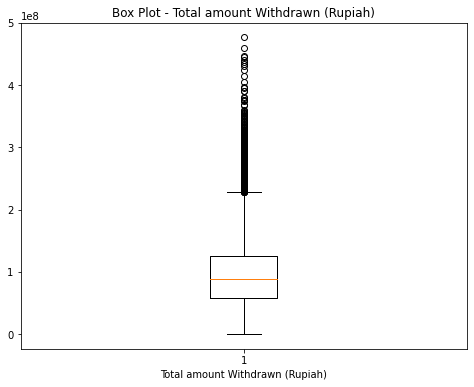

In [58]:
# Identifikasi outlier
outliers = atm[(atm['Total amount Withdrawn (Rupiah)'] < lower_bound) | (atm['Total amount Withdrawn (Rupiah)'] > upper_bound)]

# Visualisasikan dengan Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(atm['Total amount Withdrawn (Rupiah)'], vert=True)
plt.title('Box Plot - Total amount Withdrawn (Rupiah)')
plt.xlabel('Total amount Withdrawn (Rupiah)')
plt.show()

Sebutkan Nama "No Of Withdrawals" dan Nama ATM yang Terdeteksi sebagai Fraud (Outlier)

In [59]:
fraud_atm = outliers[['No Of Withdrawals', 'ATM Name']]
fraud_atm 

,No Of Withdrawals,ATM Name
13,309,KK Nagar ATM
153,302,KK Nagar ATM
338,286,KK Nagar ATM
608,244,KK Nagar ATM
758,252,KK Nagar ATM
...,...,...
11469,222,Christ College ATM
11474,244,Christ College ATM
11479,261,Christ College ATM
11499,251,Christ College ATM
